# Matrizes para caminhada quântica "lackadaisical"

por 

Franklin Marquezino  
Universidade Federal do Rio de Janeiro  
URL: <http://www.cos.ufrj.br/~franklin>  

Em desenvolvimento! Adaptado do Notebook que eu preparei sobre passeio na malha bidimensional e utilizando https://arxiv.org/pdf/1706.06939.pdf.

Nesse arquivo vou descrever as matrizes que serão necessárias para nossa simulação. Provavelmente, você já acompanhou o Jupyter Notebook referente à simulação no caso unidimensional, portanto podemos continuar de onde paramos.

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [3]:
import scipy.sparse as spm

In [4]:
%matplotlib inline

In [5]:
size = 16 # Tamanho do lado da malha
verbose = True # Define se alguns prints devem ser ativados
L = 0.015  # parâmetro que define o peso do self-loop

if size>10 and verbose:
    print('Cuidado! Algumas saídas podem ficar ilegíveis para esse tamanho de malha.')
    print('Sugiro definir verbose=False ou diminuir a malha.')

Cuidado! Algumas saídas podem ficar ilegíveis para esse tamanho de malha.
Sugiro definir verbose=False ou diminuir a malha.


## 1. Definições do espaço de Hilbert

`O parágrafo abaixo precisa ser revisado à luz do artigo https://arxiv.org/pdf/1706.06939.pdf`

De acordo com o primeiro postulado, o estado do caminhante quântico deve ser um vetor unitário num espaço de Hilbert. Em nosso exemplo, consideramos que o caminhante ocupa uma *posição* no grafo "malha bidimensional" com número de vértices (nós) igual ao quadrado de `size`. Portanto, o espaço de Hilbert associado a posição é $\mathcal{H}_\mbox{P}$ de dimensão igual ao quadrado de `size`. A base de $\mathcal{H}_\mbox{size}$ pode ser denotada por $\{ | x \rangle : 0 \leq x < \mbox{size}^2 \}$, ou de forma mais intuitiva, por $\{ | x,y \rangle : 0 \leq x,y < \mbox{size} \}$.

Como sabemos, o caminhante quântico discreto no tempo ainda precisa de um grau de liberdade adicional, além da posição. Esse grau de liberdade nós chamamos de *moeda*, semelhantemente ao que estudamos no caso unidimensional. O espaço de Hilbert associado a moeda é $\mathcal{H}_\mbox{M}$ de dimensão igual a 5. (Note que dessa vez temos cinco resultados possíveis para o "lançamento da moeda": o caminhante pode ir para a esquerda, para a direita, para cima, para baixo ou, no caso do passeio lackadaisical, pode também permenecer onde está.) A base de $\mathcal{H}_\mbox{M}$ pode ser denotada por $\{ | m \rangle : 0 \leq m < 5 \}$.
<!--- , ou de forma mais intuitiva, por $\{ | m, n \rangle : 0 \leq m, n \leq 1 \}$. -->

De acordo com o terceiro postulado da mecânica quântica, o estado do caminhante é um vetor unitário no espaço $\mathcal{H}_\mbox{M} \otimes \mathcal{H}_\mbox{P}$. Ou seja, é um vetor que num instante de tempo $t$ qualquer pode ser escrito como
$$| \Psi (t) \rangle = \sum_{m=0}^{4} \sum_{x,y=0}^{\mbox{size}-1} \psi_{m;x,y}(t) | m \rangle \otimes | x,y \rangle,$$
com $\psi_{m;x} \in \mathbb{C}$.
Para que esse vetor seja unitário, precisamos que $\sum_{m}\sum_{x,y} |\psi_{m;x,y}(t)|^2 = 1.$

Vejamos como fica isso no Python! Nosso estado inicial será 
$$| \Psi (0) \rangle =  | s_c \rangle  \otimes \sum_{x,y=0}^{\mbox{size}-1}| x,y \rangle,$$
onde $| s_c \rangle = \dfrac{1}{\sqrt{4+L}}\left( | 0 \rangle + | 1 \rangle + | 2 \rangle + | 3 \rangle + \sqrt{L}| 4 \rangle \right)$.

In [6]:
coinState = np.array([1., 1., 1., 1., np.sqrt(L)], dtype=complex)/np.sqrt(4+L)
print(coinState)

[0.49906513+0.j 0.49906513+0.j 0.49906513+0.j 0.49906513+0.j
 0.06112275+0.j]


In [7]:
positionState = np.ones(size**2, dtype=complex)/size

""" Para ativar os prints abaixo, a varíavel 'verbose' deve ter sido definida como True. Isso só deve ser feito
    juntamente com um valor pequeno para a variável size; digamos, size=10. Caso contrário, a saída ficará ilegível. 
    Recomendo que você execute essa seção do notebook pelo menos uma vez com os prints ativados, para ajudar no
    entendimento. Alguns gráficos a partir da próxima seção, entretanto, ficarão legíveis somente com valores altos 
    em size. """

if verbose:
    print(positionState)

[0.0625+0.j 0.0625+0.j 0.0625+0.j 0.0625+0.j 0.0625+0.j 0.0625+0.j
 0.0625+0.j 0.0625+0.j 0.0625+0.j 0.0625+0.j 0.0625+0.j 0.0625+0.j
 0.0625+0.j 0.0625+0.j 0.0625+0.j 0.0625+0.j 0.0625+0.j 0.0625+0.j
 0.0625+0.j 0.0625+0.j 0.0625+0.j 0.0625+0.j 0.0625+0.j 0.0625+0.j
 0.0625+0.j 0.0625+0.j 0.0625+0.j 0.0625+0.j 0.0625+0.j 0.0625+0.j
 0.0625+0.j 0.0625+0.j 0.0625+0.j 0.0625+0.j 0.0625+0.j 0.0625+0.j
 0.0625+0.j 0.0625+0.j 0.0625+0.j 0.0625+0.j 0.0625+0.j 0.0625+0.j
 0.0625+0.j 0.0625+0.j 0.0625+0.j 0.0625+0.j 0.0625+0.j 0.0625+0.j
 0.0625+0.j 0.0625+0.j 0.0625+0.j 0.0625+0.j 0.0625+0.j 0.0625+0.j
 0.0625+0.j 0.0625+0.j 0.0625+0.j 0.0625+0.j 0.0625+0.j 0.0625+0.j
 0.0625+0.j 0.0625+0.j 0.0625+0.j 0.0625+0.j 0.0625+0.j 0.0625+0.j
 0.0625+0.j 0.0625+0.j 0.0625+0.j 0.0625+0.j 0.0625+0.j 0.0625+0.j
 0.0625+0.j 0.0625+0.j 0.0625+0.j 0.0625+0.j 0.0625+0.j 0.0625+0.j
 0.0625+0.j 0.0625+0.j 0.0625+0.j 0.0625+0.j 0.0625+0.j 0.0625+0.j
 0.0625+0.j 0.0625+0.j 0.0625+0.j 0.0625+0.j 0.0625+0.j 0.0625

In [8]:
Psi = np.kron(coinState, positionState)

if verbose:
    print(Psi)

[0.03119157+0.j 0.03119157+0.j 0.03119157+0.j ... 0.00382017+0.j
 0.00382017+0.j 0.00382017+0.j]


Vamos confirmar que a norma de $| \Psi \rangle$ é igual a 1. Ficamos satisfeitos se for um número muito próximo de 1, levando em consideração que pode haver erros de arredondamento típicos dos cálculos numéricos.

In [9]:
np.linalg.norm(Psi)

0.9999999999999993

Para saber a distribuição de probabilidades na posição do caminhante, precisamos aplicar o quarto postulado da mecânica quântica. Você pode encontrar detalhes na minha tese de doutorado. Por enquanto, podemos resumir no seguinte. A probabilidade de, no instante $t$, realizar uma medição e encontrar o caminhante na posição $x,y$, é dada por
$$p(x, y, t) = \sum_{m=0}^{4} |\psi_{m;x,y}(t)|^2.$$

Como vamos implementar isso no Python? Precisamos fazer um somatório fixando a posição e variando a moeda. No entanto, depois que aplicamos o produto de Kronecker, nosso vetor de estado ficou *aparentemente* misturado. Ou seja, só tem *um* índice para percorrer. Complicado? Nem tanto. Se analisarmos com cuidado como funciona o produto de Kronecker, veremos que podemos identificar precisamente quais entradas do vetor correspondem ao estado da moeda $m=0$, e quais correspondem ao estado da moeda $m=1$ etc. Fica mais fácil ainda se reorganizarmos o nosso vetor, usando o comando `reshape` do Numpy. Se você tiver definido a variável `verbose` como `True`, poderá ver o comando `reshape` em funcionamento logo abaixo:

In [10]:
if verbose:
    print('Assim é o vetor: \n', Psi)
    
    print('\nReorganizando as entradas (sem alterar os valores) ele vai ficar assim: ')
    Psi = Psi.reshape((5,size,size))
    print(Psi)
    print('Esse formado facilita o cálculo das probabilidades na malha 2D.')
    
    print('\nA qualquer momento posso voltar ao que tínhamos antes. Veja: ')
    Psi = Psi.reshape((5*size**2,))
    print(Psi)

Assim é o vetor: 
 [0.03119157+0.j 0.03119157+0.j 0.03119157+0.j ... 0.00382017+0.j
 0.00382017+0.j 0.00382017+0.j]

Reorganizando as entradas (sem alterar os valores) ele vai ficar assim: 
[[[0.03119157+0.j 0.03119157+0.j 0.03119157+0.j ... 0.03119157+0.j
   0.03119157+0.j 0.03119157+0.j]
  [0.03119157+0.j 0.03119157+0.j 0.03119157+0.j ... 0.03119157+0.j
   0.03119157+0.j 0.03119157+0.j]
  [0.03119157+0.j 0.03119157+0.j 0.03119157+0.j ... 0.03119157+0.j
   0.03119157+0.j 0.03119157+0.j]
  ...
  [0.03119157+0.j 0.03119157+0.j 0.03119157+0.j ... 0.03119157+0.j
   0.03119157+0.j 0.03119157+0.j]
  [0.03119157+0.j 0.03119157+0.j 0.03119157+0.j ... 0.03119157+0.j
   0.03119157+0.j 0.03119157+0.j]
  [0.03119157+0.j 0.03119157+0.j 0.03119157+0.j ... 0.03119157+0.j
   0.03119157+0.j 0.03119157+0.j]]

 [[0.03119157+0.j 0.03119157+0.j 0.03119157+0.j ... 0.03119157+0.j
   0.03119157+0.j 0.03119157+0.j]
  [0.03119157+0.j 0.03119157+0.j 0.03119157+0.j ... 0.03119157+0.j
   0.03119157+0.j 0.03119157

Agora sim, usando essa ideia fica fácil calcular as probabilidades no Python! Vejamos:

In [11]:
def get_prob(stateVector, posx, posy):
    stateVector = stateVector.reshape((5,size,size))
    prob = np.abs(stateVector[0, posx, posy])**2 + np.abs(stateVector[1, posx, posy])**2 +\
            np.abs(stateVector[2, posx, posy])**2 + np.abs(stateVector[3, posx, posy])**2 +\
            np.abs(stateVector[4, posx, posy])**2
    stateVector = stateVector.reshape((5*size**2,))
    return prob

O caminhante inicialmente está uniformemente distribuído na malha, pois assim o definimos. Portanto, a probabilidade de encontrá-lo nessa posição deve ser $1/size^2$. Vejamos:

In [12]:
1/size**2

0.00390625

In [13]:
get_prob(Psi, size//2, size//2)

0.003906250000000001

Mas tarde pode ser útil ter uma função para plotar o gráfico da distribuição de probabilidades.

In [14]:
def get_pdf(stateVector):
    """ Returns the probability distribution function (pdf) of
    a given state vector. """
    stateVector = stateVector.reshape((5,size,size))
    pdf = np.sum(np.abs(stateVector)**2, axis=0)
    stateVector = stateVector.reshape((5*size**2,))
    return pdf

In [15]:
Prob = get_pdf(Psi)
Prob = Prob.reshape((size, size))

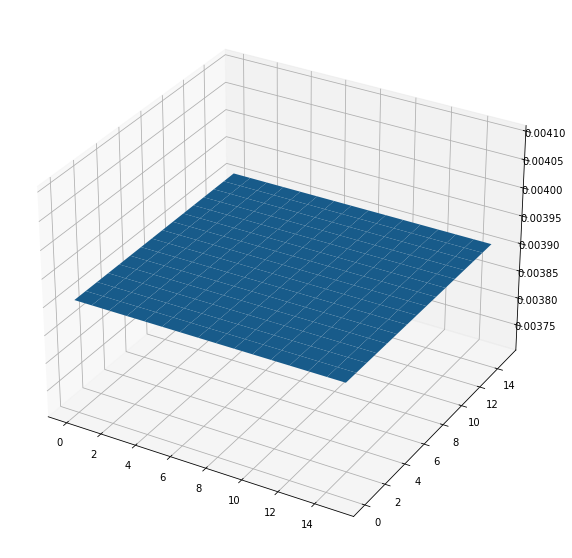

In [16]:
X,Y = np.meshgrid(range(size), range(size))

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(1, 1, 1, projection='3d')
p = ax.plot_surface(X,Y, Prob)

Agora que definimos o estado do caminhante, podemos finalmente colocá-lo para caminhar. Para isso, devemos continuar respeitando os postulados da mecânica quântica. Veremos isso na próxima seção.

## 2. Definições da caminhada

A evolução da caminhada quântica se dá por um operador unitário da forma $U = S(C \otimes I_N)$. A matriz $C$ é o operador moeda, e atua somente no subespaço $\mathcal{H}_M$. Em princípio, $C$ pode ser qualquer operador unitário de dimensão compatível com $\mathcal{H}_M$. Nesse exemplo, vamos tomar $C = 2| s_c \rangle \langle s_c| - I_5$. A matriz $I_N$ é a identidade que atua no espaço $\mathcal{H}_P$. A matriz $S$ é o operador deslocamento, que atua no espaço $\mathcal{H}_M \otimes \mathcal{H}_P$.

Vamos definir esses operadores, um de cada vez.

In [17]:
groverCoin = 2 * np.outer(coinState, coinState) - np.eye(5)
print(groverCoin)

[[-0.501868  +0.j  0.498132  +0.j  0.498132  +0.j  0.498132  +0.j
   0.06100846+0.j]
 [ 0.498132  +0.j -0.501868  +0.j  0.498132  +0.j  0.498132  +0.j
   0.06100846+0.j]
 [ 0.498132  +0.j  0.498132  +0.j -0.501868  +0.j  0.498132  +0.j
   0.06100846+0.j]
 [ 0.498132  +0.j  0.498132  +0.j  0.498132  +0.j -0.501868  +0.j
   0.06100846+0.j]
 [ 0.06100846+0.j  0.06100846+0.j  0.06100846+0.j  0.06100846+0.j
  -0.99252802+0.j]]


A matriz anterior atua somente no espaço moeda. Para termos o operador moeda que atua no espaço composto, ainda precisamos fazer o produto tensorial com o operador identidade que atua no espaço posição. Faremos isso a seguir:

In [18]:
Coin = np.kron(groverCoin, np.eye(size*size))

Note que se a malha for grande, vamos exceder o limite de memória com o passo anterior! De fato, teste o comando abaixo com algumas matrizes menores para ver quanto elas ocupariam na memória.

In [19]:
Coin = np.kron(groverCoin, np.eye(6*size))
Coin.nbytes

3686400

Portanto, vamos precisar de uma solução mais eficiente. Uma possibilidade seria armazenar somente a `groverCoin`, evitando o cálculo explícito do produto de Kronecker. Eu usei essa abordagem no simulador [QWalk](http://www.cos.ufrj.br/~franklin/qwalk/). Aqui, no entanto, vou usar uma abordagem diferente: **matrizes esparsas**!

In [20]:
groverSparse = spm.csr_matrix(groverCoin)

In [21]:
Coin = spm.kron(groverSparse, spm.identity(size*size))

Pronto! Dessa vez conseguimos guardar a matriz inteira na memória. Isso só foi possível pois a matriz possuia muitas entradas iguais a zero, e elas não precisaram ser armazenadas. Veja quantas entradas diferentes de zero nossa matriz possui:

In [22]:
Coin.nnz

6400

Compare com o tamanho total da matriz, incluindo as entradas iguais a zero:

In [23]:
Coin.shape

(1280, 1280)

Agora vamos definir o operador deslocamento. Esse operador modifica a posição de forma dependente da moeda. A estrutura dele, portanto, é um pouco mais complicada. Já vimos que nossa moeda pode ser representada por um estado $|m\rangle$ com $0 \leq m < 5$. Vamos associar 0, 1, 2, 3, 4 respectivamente a cima, baixo, esquerda, direita, self-loop. 

In [24]:
#precisa conferir!
Shift = spm.lil_matrix((5*size**2, 5*size**2), dtype=complex)

for x in range(0,size):
    for y in range(0, size):
        for m in range(5):
            linha = (m*size + x)*size + y
            
            if m == 0:  # cima                
                coluna = (1*size + x)*size + (y+1)%size
            elif m == 1:  # baixo                
                coluna = (0*size + x)*size + (y-1)%size
            elif m == 2:  # esquerda                
                coluna = (3*size + (x-1)%size)*size + y
            elif m == 3:  # direita                
                coluna = (2*size + (x+1)%size)*size + y
            elif m == 4:  # self-loop                
                coluna = (m*size + x)*size + y
            
            Shift[linha,coluna] = 1.0

Agora sim, temos tudo que precisamos para definir o operador de evolução $U$.

In [25]:
U = Coin*Shift

O Scipy permite vários tipos de armazenamento de matrizes esparsas. Vou usar o formato CSR pois creio que será provavelmente mais eficiente para operações de multiplicação matriz-vetor. (Mas não fiz nenhum teste de eficiencia, e não é o objetivo desse notebook.)

In [26]:
U = spm.csr_matrix(U)

O nosso problema agora é encontrar um determinado vértice, representado por $|w\rangle$, que satisfaça uma certa propriedade. Por simplicidade, digamos que queremos buscar o vértice que está bem no meio da malha. Se temos uma malha 200 x 200, queremos encontrar então o vértice $|100,100\rangle$. Pode parecer estranho escrever um algoritmo para encontrar algo que já sabemos onde está... mas lembre-se que estamos simplificando as coisas por fins didáticos.

A busca baseada em passeio quântico, obviamente, depende da definição do passeio quântico! Então vamos definir o operador de passeio quântico na malha 2D.

O algoritmo vai ser bem parecido com o algoritmo de Grover. Nós precisamos de um oráculo para marcar o vértice procurado. Tem como fazer esse oráculo de duas formas diferentes, veja no artigo. Aqui vou implementar só um deles, o outro fica como exercício.

In [27]:
p_aux = np.zeros(size)
p_aux[size//2] = 1.0
p = np.kron(p_aux, p_aux)
Oracle = spm.eye(5*size**2) - 2*spm.kron(np.outer(coinState,coinState), np.outer(p,p))

O algoritmo de busca é obtido pelo operador de passeio acrescido de um operador oráculo.

In [28]:
Uprime = U*Oracle

In [29]:
np.linalg.norm(Psi)

0.9999999999999993

In [30]:
tempo = 8*size   # não precisaria disso tudo, mas assim é útil para visualizar o comportamento do gráfico
Probs = []
Success_probs = []

In [31]:
Psit = Psi[:]
for t in range(tempo):
    Psit = Uprime.dot(Psit)
    np.testing.assert_allclose(np.linalg.norm(Psit), 1.0)
    
    Prob = get_pdf(Psit)
    Prob = Prob.reshape((size, size))
    Probs.append(Prob)
    Success_probs.append(Prob[size//2, size//2])

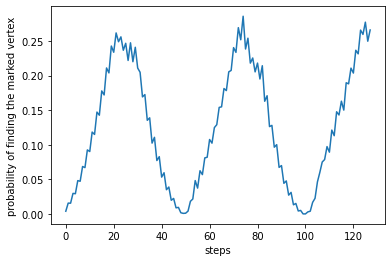

In [32]:
plt.ylabel('probability of finding the marked vertex')
plt.xlabel('steps')
plt.plot(Success_probs)

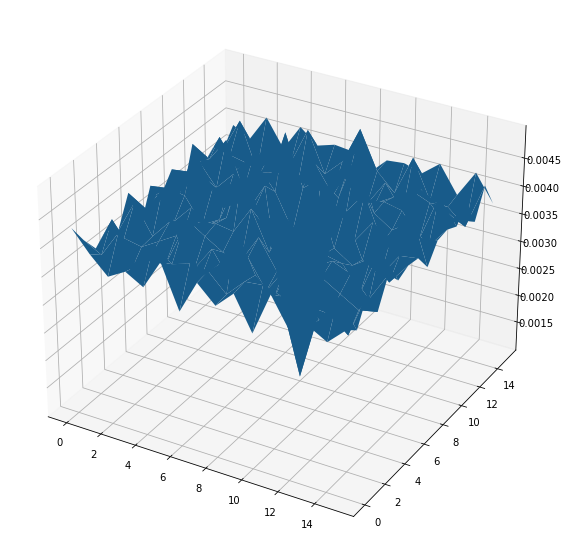

In [33]:
X,Y = np.meshgrid(range(size), range(size))

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(1, 1, 1, projection='3d')
p = ax.plot_surface(X,Y, Probs[50])

Espero que tenha sido útil. Você pode agora clicar em `Kernel / Restart`, voltar ao início do notebook e repetir os comandos, fazendo modificações de acordo com sua curiosidade.

## Referências

1. Marquezino, F.L., "Análise, simulações e aplicações algorítmicas de caminhadas quânticas". Tese de Doutorado. Laboratório Nacional de Computação Cientícia, Petrópolis, 2010. Disponível em <http://qubit.lncc.br/files/flmarquezino_phd.pdf>.
1. Marquezino, F.L. and Portugal, R., "The QWalk Simulator of Quantum Walks". Computer Physics Communications, Volume 179, Issue 5, pages 359-369, 2008. Preprint disponível em <http://arxiv.org/abs/0803.3459>.
1. Portugal, R., Lavor, C.C., Carvalho, L.M. and Maculan, N., "Uma introdução à Computação Quântica", Notas em Matemática Aplicada, SBMAC, 2004. Disponível em <http://www.sbmac.org.br/boletim/pdf_2004/livro_08_2004.pdf>.